<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas_esericizi/blob/main/geopandas_base_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/_solved/01-introduction-geospatial-data.ipynb

link github di jorisvandenbossche




In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

countries = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
countries

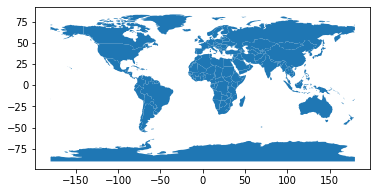

In [ ]:
countries.plot() #crea la cartina di tutte le nazioni

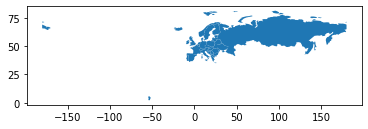

In [ ]:
africa = countries[countries['continent'] == 'Europe'] #tutte le nazioni del continente scelto
africa.plot()

In [ ]:
countries.geometry #prende solo la colonna geometria

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [ ]:
#calcola l area di uno stato in gradi quadrati
countries[countries['name'] == 'Italy'].area

In [ ]:
cities = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
cities

capire se una città si trova in una determinata nazione

In [ ]:
#edge color = colore bordo
#face color = colore sfondo
#fig size = dimensioni figura
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax, color='red') #ax = ax --> stampa i puntini sul grafico di prima 
#settiamo delle limitazioni
ax.set(xlim=(-20, 60), ylim=(-40, 40)) 

In [ ]:
#vedere solo l'italia
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax, color='red') #ax = ax --> stampa i puntini sul grafico di prima 
#settiamo delle limitazioni
ax.set(xlim=(5, 19), ylim=(35, 48)) 

esercizi


In [ ]:
stations = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/paris_bike_stations_mercator.gpkg?raw=true")
stations

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)
...,...,...,...,...
1221,12011 - CHARENTON,36,35,POINT (265227.474 6248579.501)
1222,13110 - MOULIN DE LA POINTE,22,4,POINT (262307.142 6244549.880)
1223,07006 - QUAI VOLTAIRE,32,25,POINT (259532.287 6250960.774)
1224,21311 - GAMBETTA (ISSY LES MOULINEAUX),55,47,POINT (253646.981 6245637.291)


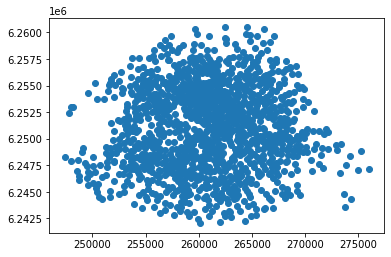

In [ ]:
stations.plot()

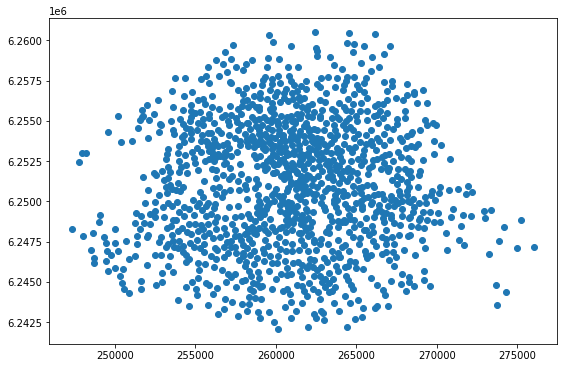

In [ ]:
stations.plot(figsize=(12,6))

In [ ]:
!pip install contextily

In [ ]:
import contextily #serve a visua le mappe sotto le nostre informazioni

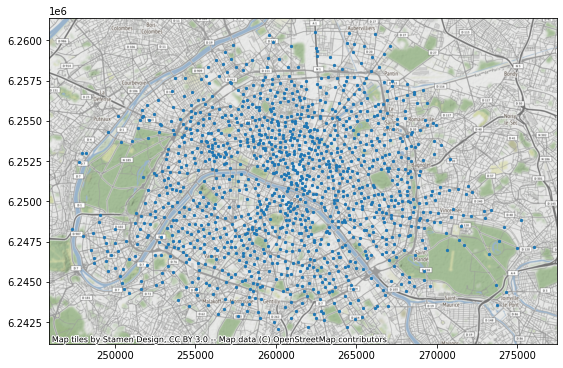

In [ ]:
#mark size = grandezza pallini
ax = stations.plot(figsize=(12,6), markersize=5)
contextily.add_basemap(ax) #aggiunge la mappa

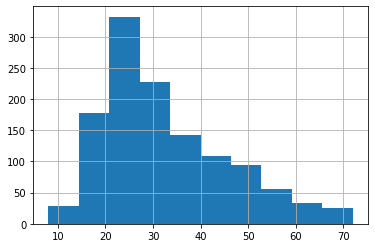

In [ ]:
stations['bike_stands'].hist() #hist = istogramma
#l asse x = posti
#l asse y = n stazioni

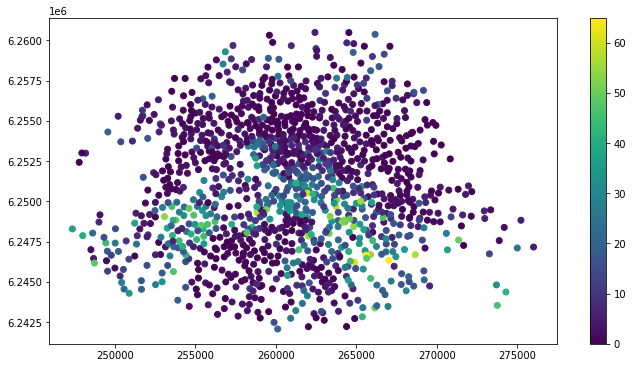

In [ ]:
stations.plot(figsize=(12, 6), column='available_bikes', legend=True)

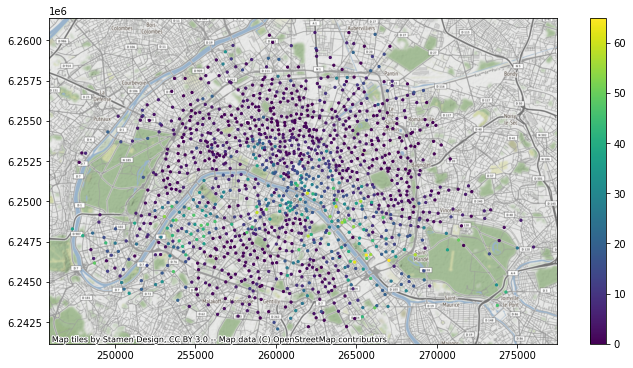

In [ ]:
ax = stations.plot(figsize=(12,6), column = 'available_bikes', markersize=5, legend=True)
contextily.add_basemap(ax)

In [ ]:
districts = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/raw/main/data/paris_districts_utm.geojson")
districts

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."
...,...,...,...,...
75,76,Combat,38988,"POLYGON ((455155.128 5414359.413, 455239.337 5..."
76,77,Belleville,35773,"POLYGON ((454767.853 5412865.188, 454761.185 5..."
77,78,Saint-Fargeau,42087,"POLYGON ((457014.145 5413260.154, 457015.161 5..."
78,79,Père-Lachaise,42332,"POLYGON ((455648.392 5411702.054, 455580.676 5..."


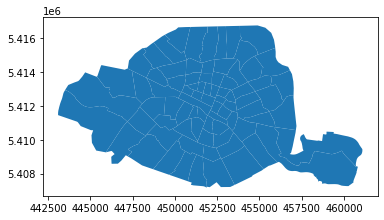

In [ ]:
districts.plot()

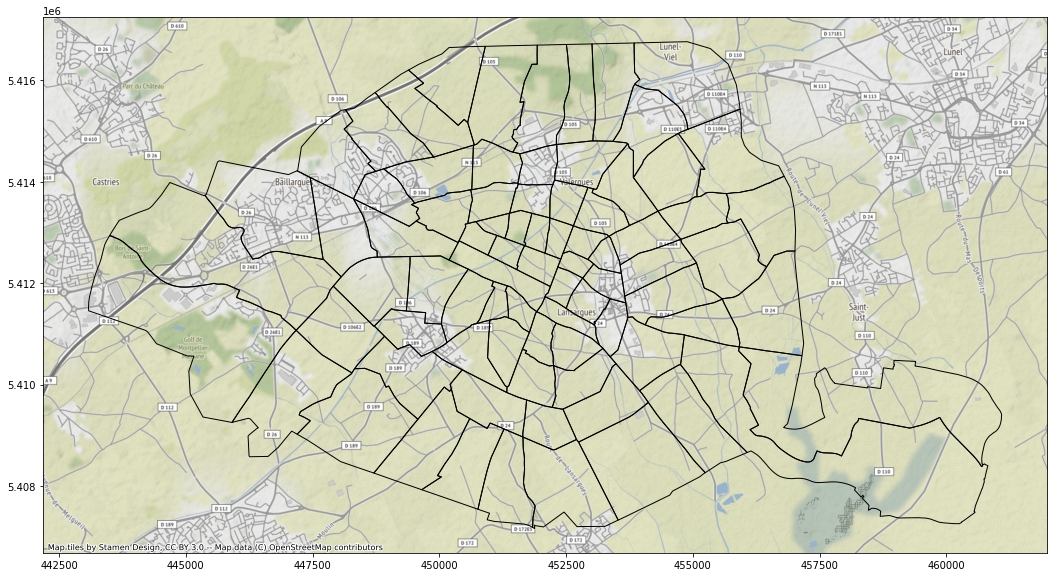

In [ ]:
ax = districts.plot(edgecolor='k', facecolor='none', figsize=(18, 12))
contextily.add_basemap(ax)

In [ ]:
districts.geometry.area
districts['area'] = districts.geometry.area / 1e6
districts

,id,district_name,population,geometry,area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",0.868538
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",0.412237
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",0.273549
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.269311
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",0.187910
...,...,...,...,...,...
75,76,Combat,38988,"POLYGON ((455155.128 5414359.413, 455239.337 5...",1.294254
76,77,Belleville,35773,"POLYGON ((454767.853 5412865.188, 454761.185 5...",0.806119
77,78,Saint-Fargeau,42087,"POLYGON ((457014.145 5413260.154, 457015.161 5...",1.486139
78,79,Père-Lachaise,42332,"POLYGON ((455648.392 5411702.054, 455580.676 5...",1.598127


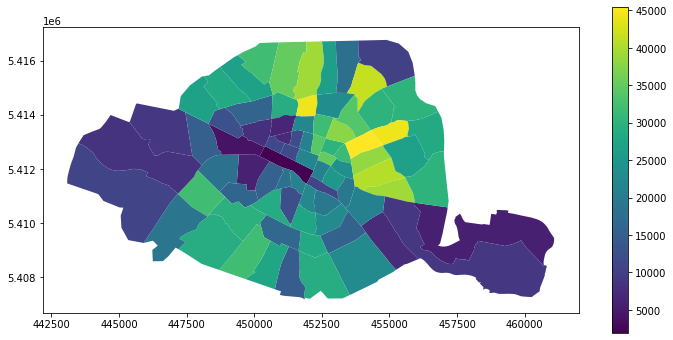

In [ ]:
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6 #divide la popolaz per l area
districts.plot(column='population_density', figsize=(12, 6), legend=True)